In [18]:
from typing import Tuple
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from lab1.Lab1_FK_answers import *

In [16]:
bvh = "..\\data\\simple.bvh"
joint_name, joint_parent, joint_offset = part1_calculate_T_pose(bvh)
motion_data = load_motion_data(bvh)
joint_positions, joint_orientations = part2_forward_kinematics(joint_name, joint_parent, joint_offset, motion_data, 0)

target = np.array([1., 1., 1.])
# joint_name, joint_parent, joint_offset, motion_data, joint_positions, joint_orientations

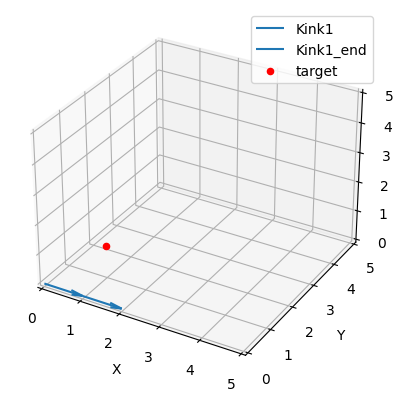

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(1, joint_positions.shape[0]):
    ax.quiver(joint_positions[joint_parent[i], 0], joint_positions[joint_parent[i], 1], joint_positions[joint_parent[i], 2], 
          joint_positions[i, 0] - joint_positions[joint_parent[i], 0], 
          joint_positions[i, 1] - joint_positions[joint_parent[i], 1], 
          joint_positions[i, 2] - joint_positions[joint_parent[i], 2], label=joint_name[i])

ax.scatter(target[0], target[1], target[2], c='r', marker='o', label='target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(0, 5)  # Set X-axis limits
ax.set_ylim(0, 5)  # Set Y-axis limits
ax.set_zlim(0, 5)  # Set Z-axis limits

ax.legend()

#### compute end-effector gradient

In [40]:
m = 4
l = np.arange(m * 3).reshape(m, 3)
l

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [45]:
np.cumsum(l, axis=0)[::-1]

array([[18, 22, 26],
       [ 9, 12, 15],
       [ 3,  5,  7],
       [ 0,  1,  2]])

In [42]:
l[::-1]

array([[ 9, 10, 11],
       [ 6,  7,  8],
       [ 3,  4,  5],
       [ 0,  1,  2]])

In [43]:
np.cumsum(l[::-1], axis=0)

array([[ 9, 10, 11],
       [15, 17, 19],
       [18, 21, 24],
       [18, 22, 26]])

In [44]:
cumulative_sum = np.cumsum(l[::-1], axis=0)[::-1]
cumulative_sum

array([[18, 22, 26],
       [18, 21, 24],
       [15, 17, 19],
       [ 9, 10, 11]])

In [46]:
blocks = np.cross(np.array([1, 0, 0]), cumulative_sum), np.cross(np.array([0, 1, 0]), cumulative_sum), np.cross(np.array([0, 0, 1]), cumulative_sum)
blocks

(array([[  0, -26,  22],
        [  0, -24,  21],
        [  0, -19,  17],
        [  0, -11,  10]]),
 array([[ 26,   0, -18],
        [ 24,   0, -18],
        [ 19,   0, -15],
        [ 11,   0,  -9]]),
 array([[-22,  18,   0],
        [-21,  18,   0],
        [-17,  15,   0],
        [-10,   9,   0]]))

In [48]:
result = np.vstack(blocks).T
result

array([[  0,   0,   0,   0,  26,  24,  19,  11, -22, -21, -17, -10],
       [-26, -24, -19, -11,   0,   0,   0,   0,  18,  18,  15,   9],
       [ 22,  21,  17,  10, -18, -18, -15,  -9,   0,   0,   0,   0]])

In [49]:
result2 = np.stack(blocks)
result2.shape

(3, 4, 3)

In [52]:
result2.reshape(12, 3)

array([[  0, -26,  22],
       [  0, -24,  21],
       [  0, -19,  17],
       [  0, -11,  10],
       [ 26,   0, -18],
       [ 24,   0, -18],
       [ 19,   0, -15],
       [ 11,   0,  -9],
       [-22,  18,   0],
       [-21,  18,   0],
       [-17,  15,   0],
       [-10,   9,   0]])

In [ ]:


# Create an array of ones for the first column of each block
ones_column = np.ones((m, 1))

# Compute the cumulative sum from each row to the last row

# Create the block for each row in l


# Stack the blocks vertically to obtain the final 3m by 3 array


print(result)

In [ ]:
# compute end-effector gradient
# compute loss function gradient
# update orientations
# update positions
# repeat

In [ ]:
def finite_difference():
    pass


def jacobian_transpose() -> Tuple[np.ndarray, np.ndarray]:
    """Return final joint positions and orientations"""
    pass